In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import functions as fun

In [2]:
#mods = fun.models()
mods = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [3]:
var = ['steric','glacier','Gsmb','Asmb','Adyn']
scens = ['rcp45','rcp85']
cols = ['tab:blue','tab:red']

In [4]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .2
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .15
mpl.rcParams['figure.subplot.right']  = .95
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.hspace'] = .1
mpl.rcParams['figure.figsize']        = 7,4


In [5]:
ar5_md = np.array([[19,12,4,-2,7],[27,16,7,-4,7]])
ar5_05 = np.array([[14,6,1,-5,-1],[21,9,3,-7,-1]])
ar5_95 = np.array([[23,19,9,-1,16],[33,23,16,-1,16]])

def ar5bar(ax,s,v):
    dax = ax[s,v]
#    dax.plot([2105,2110],[ar5_md[s,v],ar5_md[s,v]],color='k',lw=2,solid_capstyle='butt',clip_on=False)
    dax.fill_between([2107,2112],[ar5_05[s,v],ar5_05[s,v]]-ar5_md[s,v],[ar5_95[s,v],ar5_95[s,v]]-ar5_md[s,v],color='.5',clip_on=False,zorder=0)

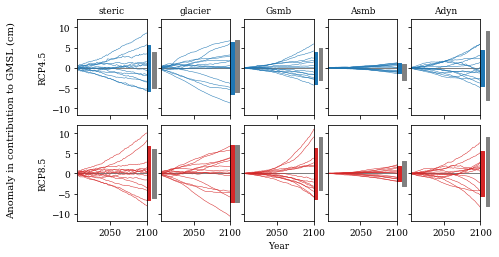

In [8]:
fig,ax = plt.subplots(2,len(var),sharey=True,sharex=True)

slab = ['RCP4.5','RCP8.5']

with xr.open_dataset(f'../data/{var[0]}/{mods[0]}_{scens[0]}.nc') as ds:
    time = ds['time']

for v,vv in enumerate(var):
    for s,scen in enumerate(scens):   
        ens = np.zeros((len(mods),len(time)))
        ax[s,v].plot(time,0.*time,lw=.5,color='k')
        for m,model in enumerate(mods):
            with xr.open_dataset(f'../data/{vv}/{model}_{scen}.nc') as ds:
                ens[m,:] = ds['SLR']
        for m,model in enumerate(mods):
            ax[s,v].plot(time,ens[m]-np.nanmean(ens,axis=0),lw=.5,color=cols[s])
        sd = np.nanstd(np.nanmean(ens[:,-20:],axis=1),axis=0)
        lr = 1.645*np.array([sd,sd])
        ax[s,v].fill_between([2100,2105],-lr,lr,color=cols[s],clip_on=False)
        ar5bar(ax,s,v)
        ax[s,v].set_xlim([2005,2100])
    ax[0,v].set_title(vv)
for s in [0,1]:
    ax[s,0].set_ylabel(f'{slab[s]}')
ax[1,2].set_xlabel('Year')

fig.text(0.02, 0.55, 'Anomaly in contribution to GMSL (cm)',rotation='vertical',va='center',ha='center',rotation_mode='anchor')

figname = 'draftplot_ts_uncertainty.pdf'

plt.savefig(f'../figures/{figname}',dpi=200)
plt.savefig(f'../../../writing/codependence/figures/{figname}')
plt.show()
plt.close()